## Project of Credit Card Fraud Detection

#### 1. Import required packages

In [1350]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB


#### 2. Read Excel dataset from system based on file path provided

In [1352]:
# Function to request user for dataset file path until correct file path is provided
import os

def get_valid_filepath():
    while True:
        inputDataFile = input("Please provide the dataset file path: ")
        if os.path.isfile(inputDataFile):
            print("Thank you !")
            return inputDataFile
        else:
            print("Invalid file path. Please provide the correct path: ")

# Call function and display the specified file path
inputDataFile = get_valid_filepath()
print("File found at specified path:", inputDataFile)

Please provide the dataset file path:  C:/Users/pemma/Documents/UNF/2. Term-2/Predictive Analytics/Project/Credit Card Fraud Detection.xlsx


Thank you !
File found at specified path: C:/Users/pemma/Documents/UNF/2. Term-2/Predictive Analytics/Project/Credit Card Fraud Detection.xlsx


In [1354]:
# Build the dataset based on the input file provided
#inputDataFile = "C:/Users/pemma/Documents/UNF/2. Term-2/Predictive Analytics/Project/Credit Card Fraud Detection.xlsx"
df_CCD_Original=pd.read_excel(inputDataFile)

#### 3. Print general information about dataset like Dimentions, Feature info, null values existence, descriptive statistics

In [1356]:
# Check the number of rows and columns in the dataset
print ("(Rows and Columns) : ", df_CCD_Original.shape)

(Rows and Columns) :  (14384, 29)


In [1358]:
# Displays the first few rows of the dataset
df_CCD_Original.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,...,gas_transport_flag,misc_net_flag,kids_pets_flag,shopping_pos_flag,entertainment_flag,food_dining_flag,home_flag,personal_care_flag,travel_flag,is_fraud
0,2019-01-04 00:58:00,Stokes-Christiansen and Sipes,grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,Administrator-education,...,0,0,0,0,0,0,0,0,0,1
1,2019-01-04 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,Administrator-education,...,0,0,0,0,0,0,0,0,0,1
2,2019-01-04 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,Administrator-education,...,0,0,0,0,0,0,0,0,0,1
3,2019-01-04 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,Administrator-education,...,0,0,0,0,0,0,0,0,0,1
4,2019-01-04 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,Administrator-education,...,0,0,0,0,0,0,0,0,0,1


In [1360]:
# Displays the last few rows of the dataset
df_CCD_Original.tail()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,...,gas_transport_flag,misc_net_flag,kids_pets_flag,shopping_pos_flag,entertainment_flag,food_dining_flag,home_flag,personal_care_flag,travel_flag,is_fraud
14379,2020-12-31 23:58:00,Pouros-Walker and Spence,kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,...,0,0,1,0,0,0,0,0,0,0
14380,2020-12-31 23:59:00,Breitenberg LLC,travel,7.99,Mesa,ID,44.6255,-116.4493,129,Cartographer,...,0,0,0,0,0,0,0,0,1,0
14381,2020-12-31 23:59:00,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,...,0,0,1,0,0,0,0,0,0,0
14382,2020-12-31 23:59:00,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,...,0,0,0,0,0,0,0,0,0,0
14383,2020-12-31 23:59:00,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,...,0,0,0,0,0,0,0,0,0,0


In [1362]:
# Displays Dataset information like:
    # Number of records, range, number of columns and information aboubt each column, like:
        # Col Index, Column Name, Number of null values and datatype of the column

df_CCD_Original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14384 entries, 0 to 14383
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14384 non-null  datetime64[ns]
 1   merchant               14384 non-null  object        
 2   category               14384 non-null  object        
 3   amt                    14384 non-null  float64       
 4   city                   14384 non-null  object        
 5   state                  14384 non-null  object        
 6   lat                    14384 non-null  float64       
 7   long                   14384 non-null  float64       
 8   city_pop               14384 non-null  int64         
 9   job                    14384 non-null  object        
 10  dob                    14384 non-null  datetime64[ns]
 11  trans_num              14384 non-null  object        
 12  merch_lat              14384 non-null  float64       
 13  m

In [1364]:
# Displays the descriptive statistics of all variables
df_CCD_Original.describe()

,trans_date_trans_time,amt,lat,long,city_pop,dob,merch_lat,merch_long,grocery_net_flag,shopping_net_flag,...,gas_transport_flag,misc_net_flag,kids_pets_flag,shopping_pos_flag,entertainment_flag,food_dining_flag,home_flag,personal_care_flag,travel_flag,is_fraud
count,14384,14384.000000,14384.000000,14384.000000,1.438400e+04,14384,14384.000000,14384.000000,14384.000000,14384.000000,...,14384.000000,14384.00000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000
mean,2019-12-17 14:24:17.707174656,122.713580,39.761622,-110.834078,1.063848e+05,1971-12-05 07:55:01.668520584,39.761768,-110.834830,0.032606,0.096844,...,0.098999,0.05666,0.079255,0.093646,0.065976,0.060414,0.090587,0.068687,0.026696,0.123888
min,2019-01-01 00:00:00,1.000000,20.027100,-165.672300,4.600000e+01,1927-09-09 00:00:00,19.032689,-166.670685,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-01-12 17:06:15,11.947500,36.715400,-120.282400,4.930000e+02,1961-04-25 00:00:00,36.769143,-120.093017,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019-08-20 02:14:30,51.290000,39.666200,-111.098500,1.645000e+03,1974-01-03 00:00:00,39.614407,-111.202098,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020-12-27 21:13:00,100.140000,41.940400,-101.136000,3.543900e+04,1985-08-21 00:00:00,42.275042,-100.553670,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020-12-31 23:59:00,3261.470000,66.693300,-89.628700,2.383912e+06,2001-07-26 00:00:00,67.510267,-88.646366,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,228.872054,5.266352,12.878452,2.900351e+05,NaN,5.309006,12.888343,0.177608,0.295755,...,0.298671,0.23120,0.270145,0.291345,0.248249,0.238261,0.287031,0.252931,0.161200,0.329465


In [1366]:
# Check for existence of missing/null values (isnull() also can be used)
df_CCD_Original.isna().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
grocery_net_flag         0
shopping_net_flag        0
misc_pos_flag            0
grocery_pos_flag         0
health_fitness_flag      0
gas_transport_flag       0
misc_net_flag            0
kids_pets_flag           0
shopping_pos_flag        0
entertainment_flag       0
food_dining_flag         0
home_flag                0
personal_care_flag       0
travel_flag              0
is_fraud                 0
dtype: int64

In [1368]:
# Check for existence of duplicates and if exists, remove duplicates and keep the first occurrence

NumDups = df_CCD_Original.duplicated().sum()

# Check if duplicates exist
if df_CCD_Original.duplicated().any():
    print(NumDups, " Duplicate(s) found! Removing them...\n")
    # Remove duplicates and keep the first occurrence
    df_CCD_Original = df_CCD_Original.drop_duplicates()
    
else:
    print(NumDups, " duplicate(s) found.")

# Display the cleaned DataFrame
print("DataFrame after removing duplicates:")
print (df_CCD_Original)

1  Duplicate(s) found! Removing them...

DataFrame after removing duplicates:
      trans_date_trans_time                       merchant        category  \
0       2019-01-04 00:58:00  Stokes-Christiansen and Sipes     grocery_net   
1       2019-01-04 15:06:00                   Predovic Inc    shopping_net   
2       2019-01-04 22:37:00                Wisozk and Sons        misc_pos   
3       2019-01-04 23:06:00                 Murray-Smitham     grocery_pos   
4       2019-01-04 23:59:00                     Friesen Lt  health_fitness   
...                     ...                            ...             ...   
14378   2020-12-31 23:57:00                 Schmidt-Larkin            home   
14379   2020-12-31 23:58:00       Pouros-Walker and Spence       kids_pets   
14380   2020-12-31 23:59:00                Breitenberg LLC          travel   
14381   2020-12-31 23:59:00                      Rau-Robel       kids_pets   
14382   2020-12-31 23:59:00                Reilly and Sons  heal

#### 4. Check for balanced distribution

In [1550]:
# Check the distribution of Legit and Fradulent transactions
# df_CCD_Original['is_fraud'].sum()
# df_CCD_Original['is_fraud'].value_counts().get(1, 0)
df_CCD_Original['is_fraud'].value_counts()

is_fraud
0    12601
1     1782
Name: count, dtype: int64

This dataset is highly unbalanced 0 - Reperesents Legit Transactions 1 - Represents Fradulant Transactions

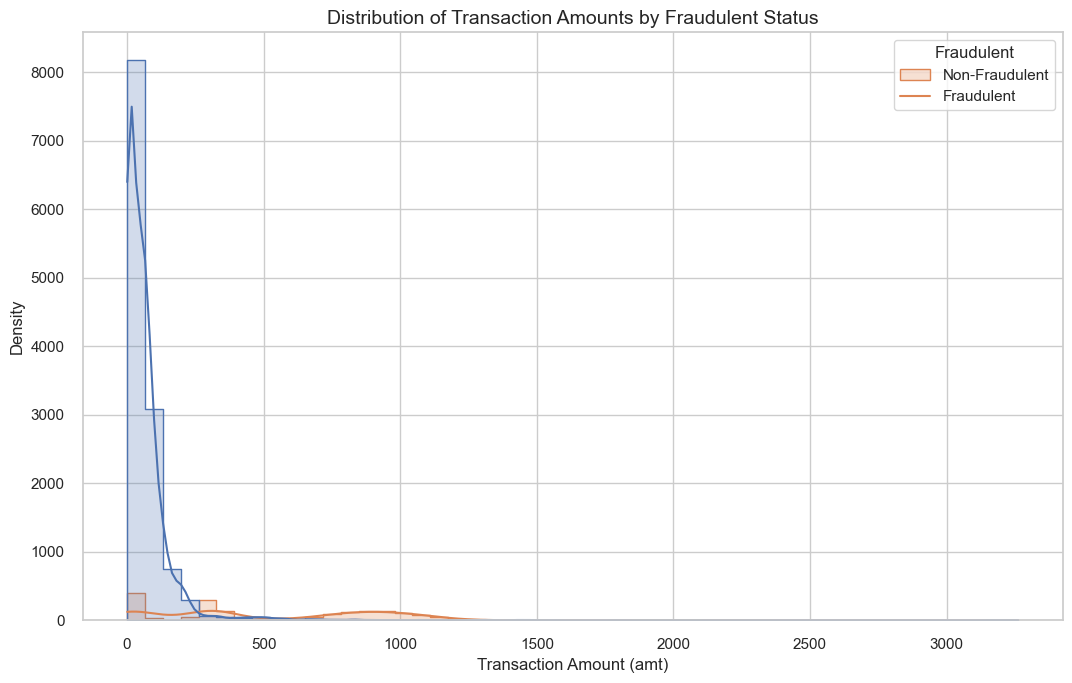

In [1548]:
# Assuming the dataset has columns `amt` (transaction amount) and `is_fraud` (fraud label)
# Generate a distribution plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot distribution for fraudulent and non-fraudulent transactions
sns.histplot(data=df_CCD_Original, x='amt', hue='is_fraud', kde=True, element='step', bins=50)

# Add titles and labels
plt.title("Distribution of Transaction Amounts by Fraudulent Status", fontsize=14)
plt.xlabel("Transaction Amount (amt)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Fraudulent", labels=["Non-Fraudulent", "Fraudulent"], loc='upper right')
plt.show()

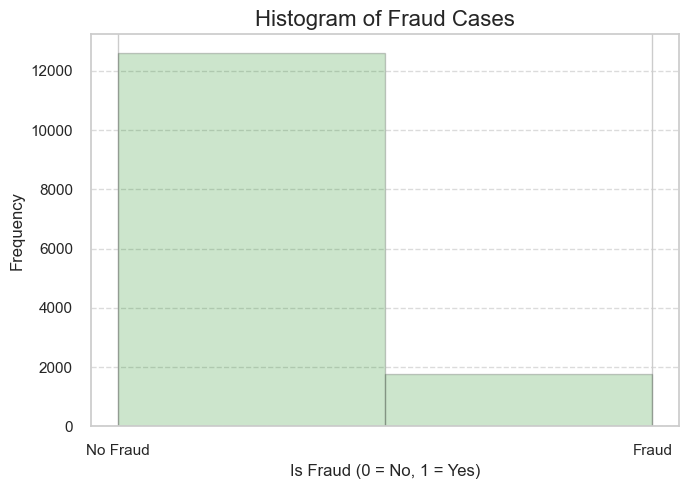

In [1376]:
import matplotlib.pyplot as plt

# Create a histogram for the 'is_fraud' column
plt.figure(figsize=(6, 4))

plt.hist(df_CCD_Original['is_fraud'], bins=2, color="green", edgecolor='black', alpha=0.2)
plt.title('Histogram of Fraud Cases', fontsize=16)
plt.xlabel('Is Fraud (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks([0, 1], ['No Fraud', 'Fraud'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 5. Balance the data - Under Sampling

As data is not distributed evenly, lets build a new data set that contains equal number of Legit and Fradulent transactions.

In [1378]:
# Seperating the fraudulant and Legit transactions
legit = df_CCD_Original[df_CCD_Original.is_fraud == 0]
fraud = df_CCD_Original[df_CCD_Original.is_fraud == 1]

In [1558]:
# Concat 2 datasets to create a new one which can be used for analysis
legit_sample=legit.sample(fraud['is_fraud'].sum())
df_CCD_Balanced = pd.concat([legit_sample,fraud],axis=0)

In [1569]:
# Number of transactions distribution after balancing the data
df_CCD_Balanced['is_fraud'].value_counts()

is_fraud
0    1782
1    1782
Name: count, dtype: int64

In [1571]:
# Dataset information after balanced sample
df_CCD_Balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3564 entries, 10989 to 8383
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  3564 non-null   datetime64[ns]
 1   merchant               3564 non-null   object        
 2   category               3564 non-null   object        
 3   amt                    3564 non-null   float64       
 4   city                   3564 non-null   object        
 5   state                  3564 non-null   object        
 6   lat                    3564 non-null   float64       
 7   long                   3564 non-null   float64       
 8   city_pop               3564 non-null   int64         
 9   job                    3564 non-null   object        
 10  dob                    3564 non-null   datetime64[ns]
 11  trans_num              3564 non-null   object        
 12  merch_lat              3564 non-null   float64       
 13  merc

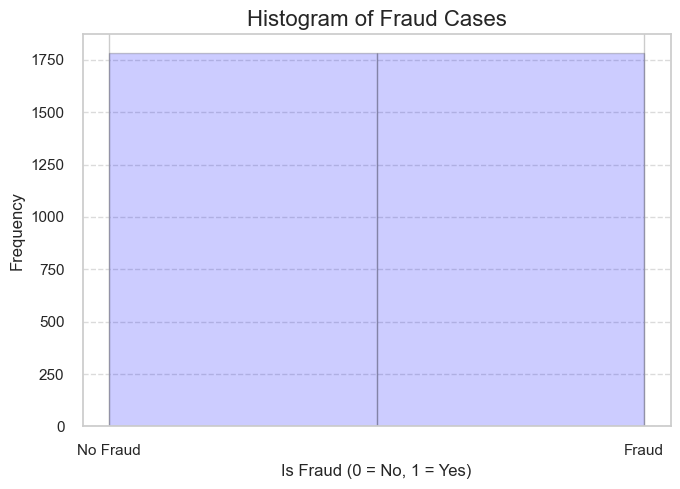

In [1386]:
# Create a histogram for the 'is_fraud' column
plt.figure(figsize=(6, 4))
plt.hist(df_CCD_Balanced['is_fraud'], bins=2, color='blue', edgecolor='black', alpha=0.2)
plt.title('Histogram of Fraud Cases', fontsize=16)
plt.xlabel('Is Fraud (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks([0, 1], ['No Fraud', 'Fraud'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 6. Select the Features for regression(s)

In [1388]:
# Selecting independent variables and dependent variable
independent_vars = [
    'grocery_net_flag', 'shopping_net_flag', 'misc_pos_flag', 'grocery_pos_flag',
    'health_fitness_flag', 'gas_transport_flag', 'misc_net_flag', 'kids_pets_flag',
    'shopping_pos_flag', 'entertainment_flag', 'food_dining_flag', 'home_flag',
    'personal_care_flag', 'travel_flag', 'amt'
]

independent_vars_Cat = [
    'grocery_net_flag', 'shopping_net_flag', 'misc_pos_flag', 'grocery_pos_flag',
    'health_fitness_flag', 'gas_transport_flag', 'misc_net_flag', 'kids_pets_flag',
    'shopping_pos_flag', 'entertainment_flag', 'food_dining_flag', 'home_flag',
    'personal_care_flag', 'travel_flag'
]

independent_vars_Amt = ['amt']

X_IndVars_All = df_CCD_Balanced[independent_vars]
X_IndVars_Cat = df_CCD_Balanced[independent_vars_Cat]
X_IndVars_Amt = df_CCD_Balanced[independent_vars_Amt]
y = df_CCD_Balanced['is_fraud']

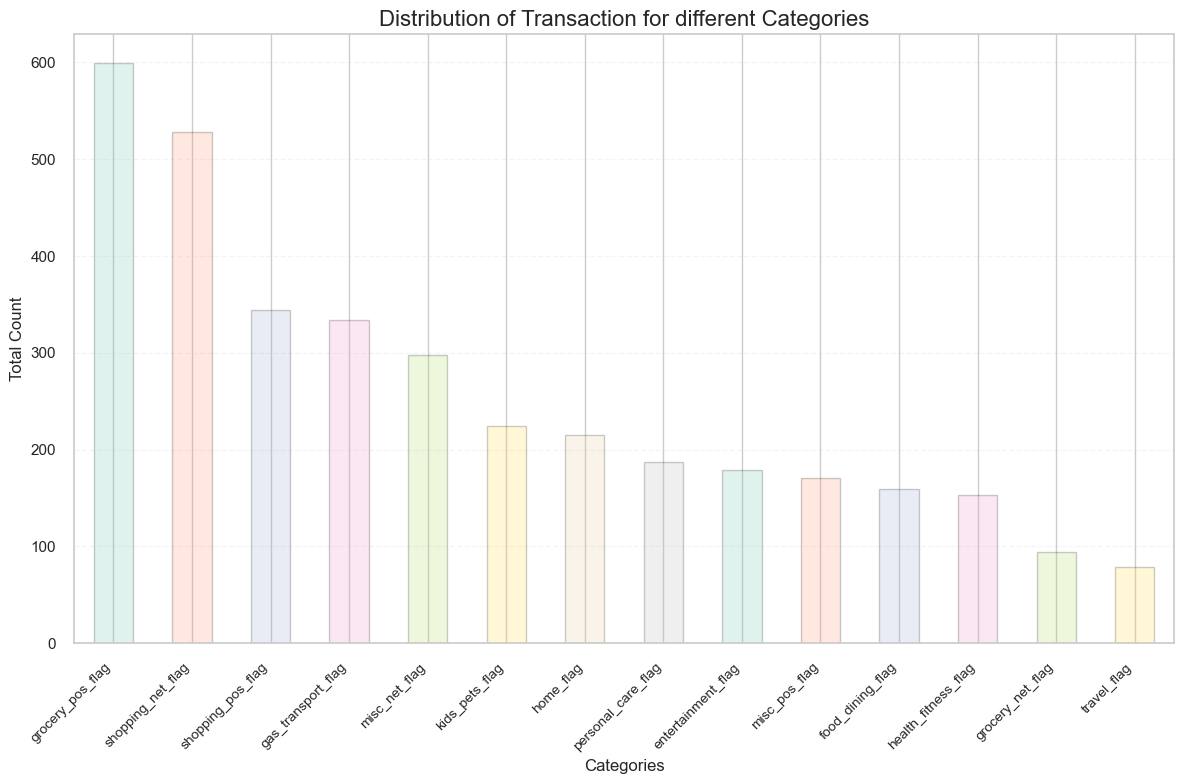

In [1561]:
# Create a bar chart showing the distribution of data across all columns with binary values
data_counts = X_IndVars_Cat.sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
# Select a nice color palette (e.g., "pastel", "viridis", "coolwarm", "Set2")
colors = sns.color_palette("Set2", len(data_counts)) 

data_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.2)
plt.title('Distribution of Transaction for different Categories', fontsize=16)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

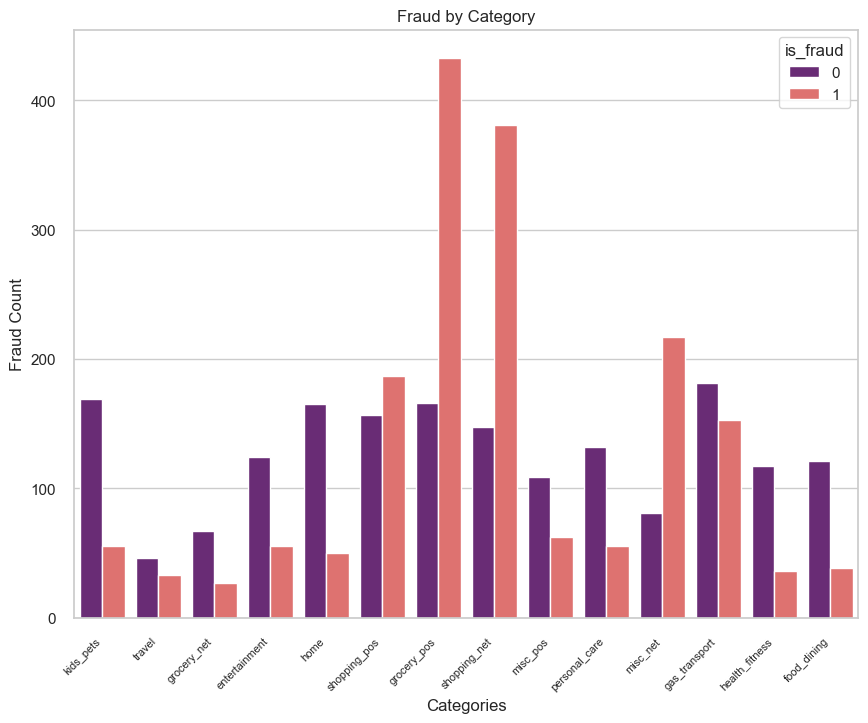

In [1398]:
# Show the distribution of Legit and fraud transactions by category
plt.figure(figsize=(8, 6)) # Set figure size for better visualization
# Create a count plot showing the distribution of chest pain types by gender
sns.countplot(data=df_CCD_Balanced, x=("category"), hue='is_fraud', palette='magma')
# Label the axes
plt.xlabel('Categories')
plt.ylabel('Fraud Count')
plt.xticks(rotation=45, ha='right', fontsize=8)
# Add a title to the plot
plt.title('Fraud by Category')
# Show the plot
plt.show()

#### 7. Identfy the correlation existence amoung indipendent features

In [1400]:
M = df_CCD_Balanced[independent_vars].corr()
print (M)

                     grocery_net_flag  shopping_net_flag  misc_pos_flag  \
grocery_net_flag             1.000000          -0.068638      -0.036949   
shopping_net_flag           -0.068638           1.000000      -0.093621   
misc_pos_flag               -0.036949          -0.093621       1.000000   
grocery_pos_flag            -0.073978          -0.187442      -0.100904   
health_fitness_flag         -0.034858          -0.088322      -0.047546   
gas_transport_flag          -0.052926          -0.134103      -0.072190   
misc_net_flag               -0.049716          -0.125970      -0.067812   
kids_pets_flag              -0.042624          -0.107998      -0.058138   
shopping_pos_flag           -0.053796          -0.136307      -0.073377   
entertainment_flag          -0.037848          -0.095899      -0.051624   
food_dining_flag            -0.035566          -0.090117      -0.048512   
home_flag                   -0.041702          -0.105664      -0.056881   
personal_care_flag       

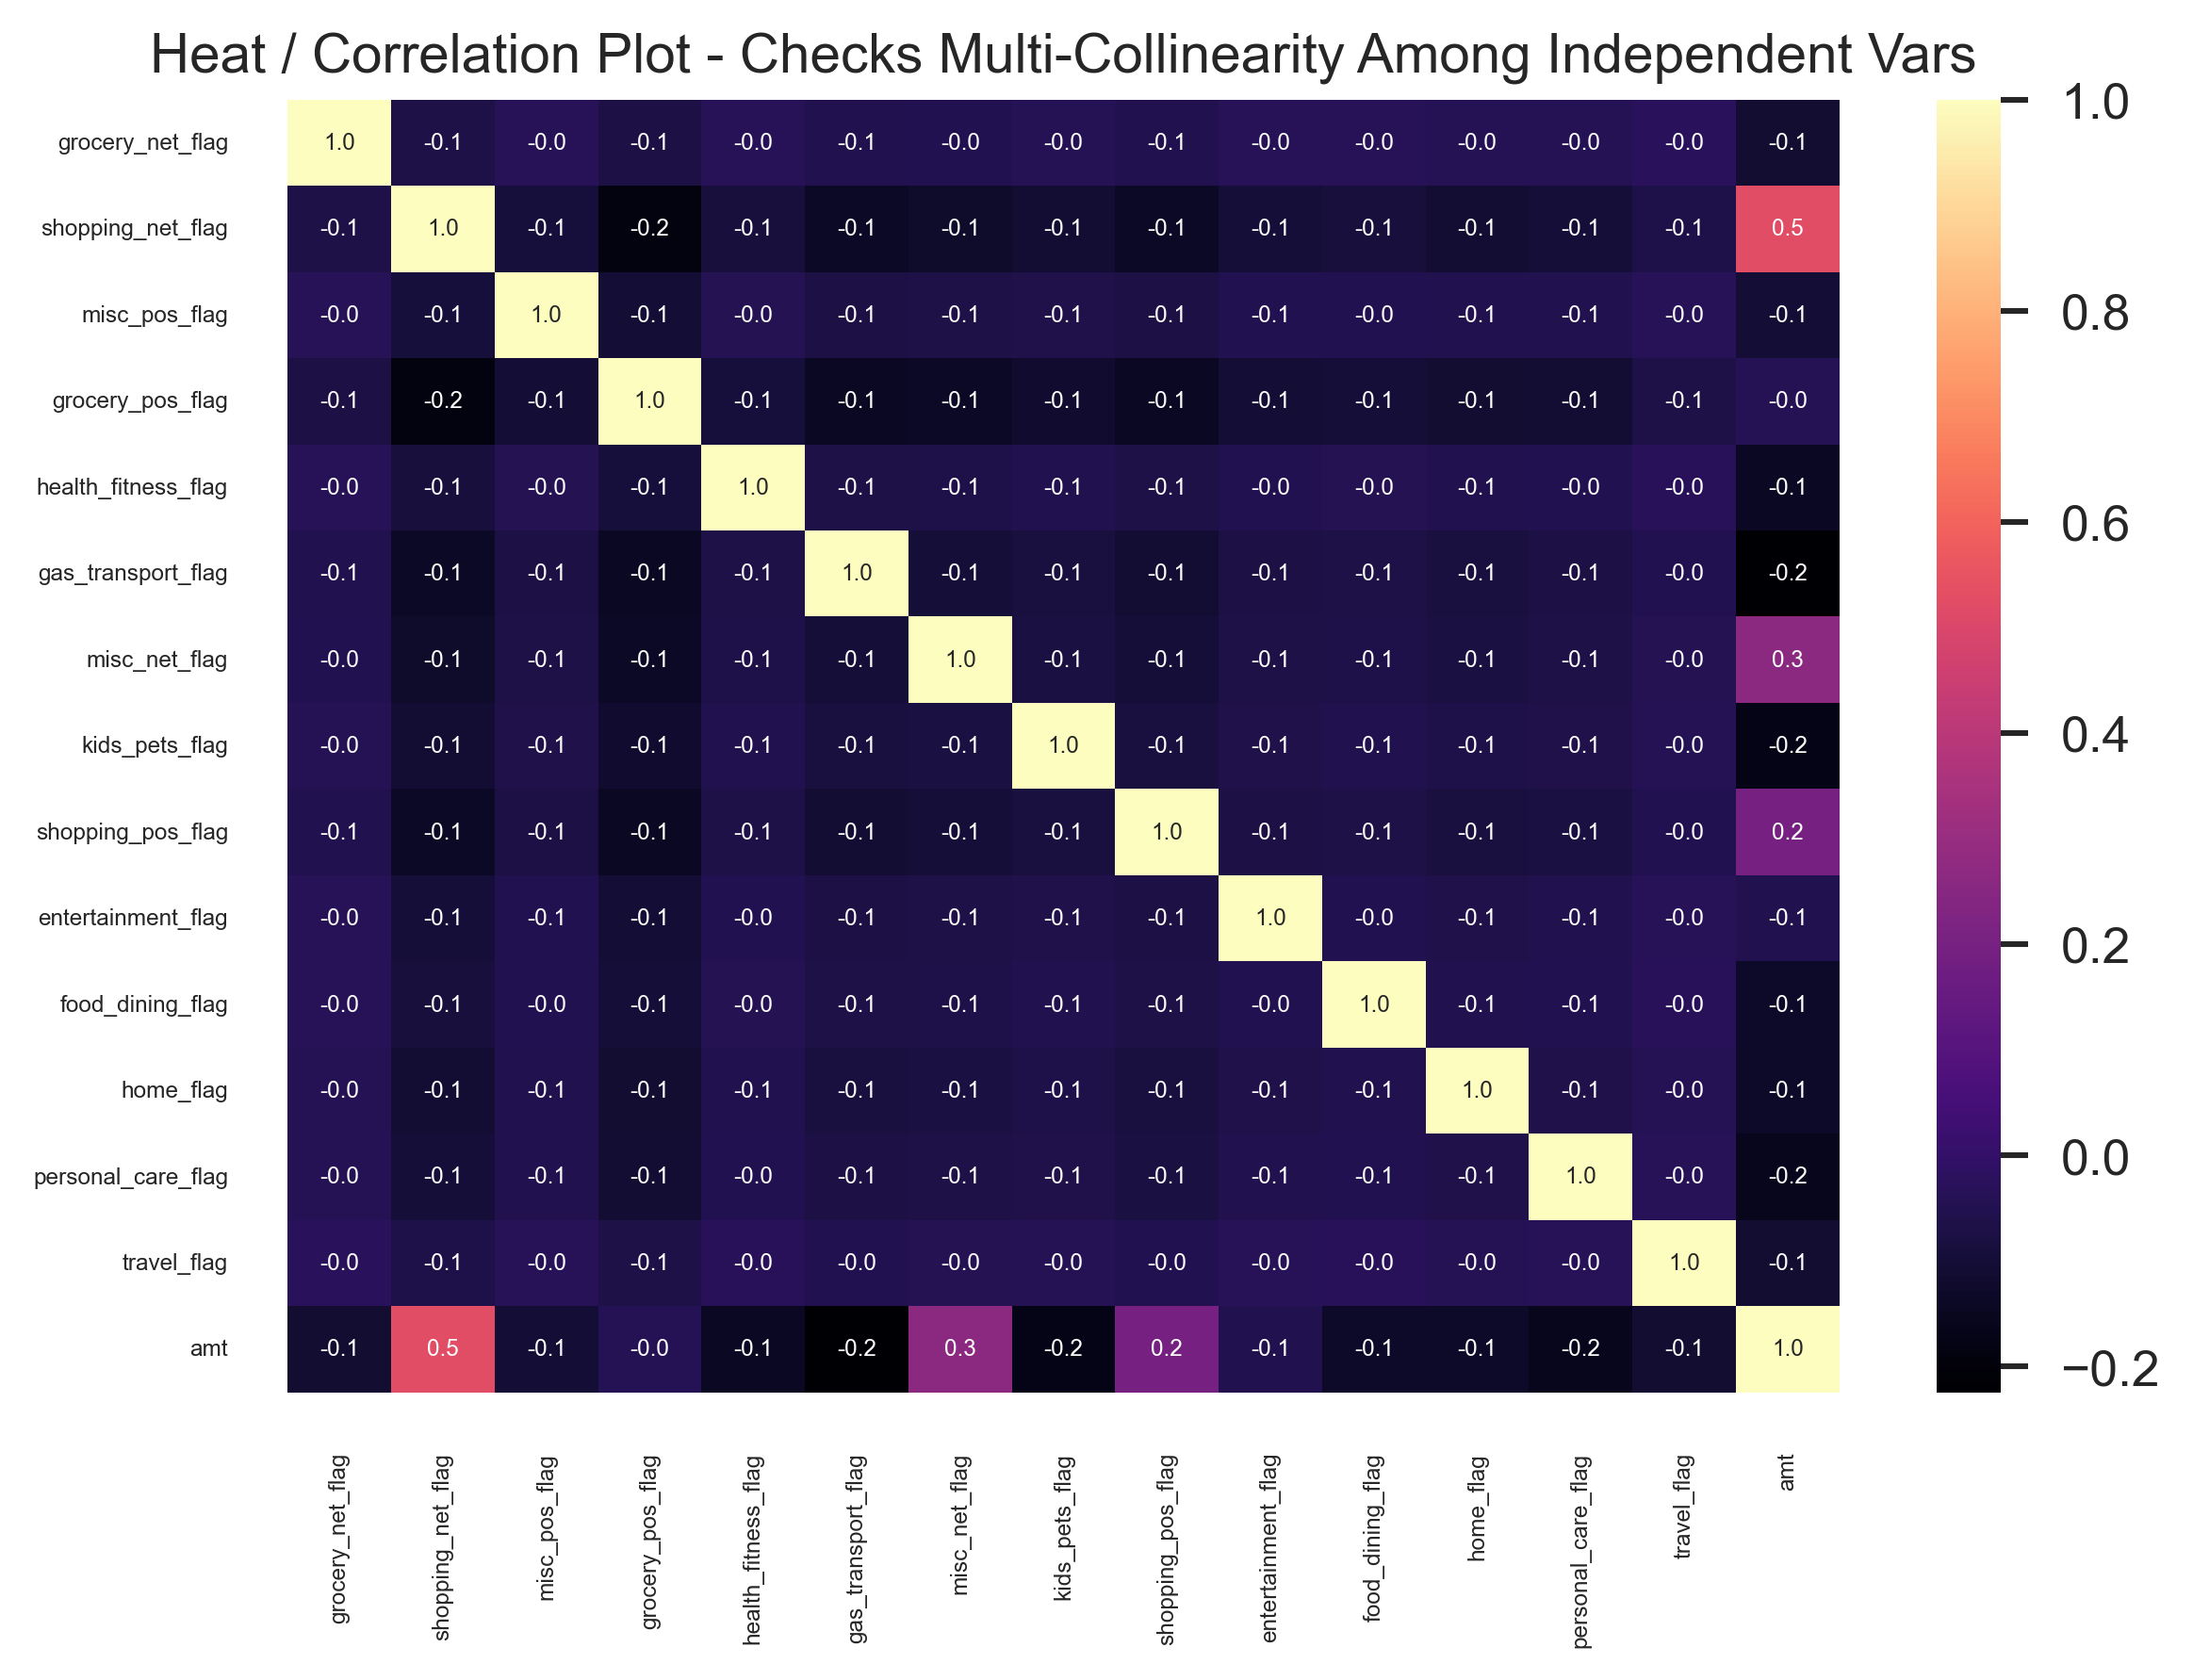

In [1402]:
# Display correlation in graph
plt.figure(figsize=(6, 4),dpi=350)
sns.heatmap(M, annot=True, cbar=True, fmt=".1f", annot_kws={"size": 5}, cmap="magma")
plt.title("Heat / Correlation Plot - Checks Multi-Collinearity Among Independent Vars")
plt.xticks(fontsize=5)  # X-axis labels
plt.yticks(fontsize=5)  # Y-axis labels
plt.show()

**As per the correlation graph, its clear that there is NO SIGNIFICANT CORRELATION among the indipendent variables**

#### 8. Start model building

##### 8.1 Split the data into Training and Test sets (80% and 20%)

In [1404]:
# X       – The feature matrix (independent vars) contains i/p data used to make predictions. Consists of multiple cols (features) and rows (samples).
# y       – The target/dependent variable that the model is trying to predict. It is usually a single-column array containing the labels or values.

# X_train – The training subset of X, containing 80% of the data (since test_size=0.2, meaning 20% of the data is allocated for testing).
# X_test  – The testing subset of X, containing 20% of the data. This subset is used to evaluate the model’s performance.

# y_train – The training subset of y, corresponding to X_train. It contains the target values for training.
# y_test  – The testing subset of y, corresponding to X_test. It contains the target values for testing.

# Portion of the whole data (X_train, y_train) used for training the model and then evaluating its performance on unseen data (X_test, y_test).

# startify=y - Maintains class balance especially with imbalanced datasets. Helps un-bias training by ensuring all classes are properly represented.
# random_state=42 – Ensures reproducibility by setting a fixed seed for random splitting. The same split will be obtained each time the code runs.

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_IndVars_All, y, test_size=0.2, stratify=y, random_state=42)


##### 8.2 Training model with sklearn

##### Model building using sklearn Vs statsmodels
1. While deriving regression line including the intercept ensures that the regression line fits the data correctly. Without it, the model may force the regression line through the origin (0,0), leading to biased predictions. 
2. 
statsmodels does not add an intercept unless explicitly stated. So, its required to add explicit intercept using add_constant() otherwise the model would assume 𝛽0=0 potentially leading to incorrect result
3. sklearn automatically includes an interce and no need of explicit inclusionpt

In [1406]:
linear_model = LogisticRegression(max_iter=6500)
# training Logistic Regression model with training data set
linear_model.fit(X_train,y_train)

LogisticRegression(max_iter=6500)

##### 8.3 Training model with statsmodels

In [1408]:
# Adding constant term for intercept in regression models
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

#### 9. Build various Models

##### Building following 4 models using statsmodels
1. Base Linear Model
2. Log-Transformed Model
3. Squre Root Model
4. Box-Cox Model

In [1410]:
# --- Base Linear Model ---
base_model = sm.OLS(y_train, X_train_const).fit()

# --- Log-Transformed Model --- (Log transform amt)
X_train_log = X_train.copy()
X_train_log['amt'] = np.log1p(X_train_log['amt'])
X_train_log_const = sm.add_constant(X_train_log)

log_model = sm.OLS(y_train, X_train_log_const).fit()

# --- Square Root Model --- (Square root transform amt)
X_train_sqrt = X_train.copy()
X_train_sqrt['amt'] = np.sqrt(X_train_sqrt['amt'])
X_train_sqrt_const = sm.add_constant(X_train_sqrt)

sqrt_model = sm.OLS(y_train, X_train_sqrt_const).fit()

# --- Box-Cox Model --- (Using power transformation on amt)
X_train_boxcox = X_train.copy()
pt = PowerTransformer(method='box-cox', standardize=False)
X_train_boxcox['amt'], lambda_ = stats.boxcox(X_train_boxcox['amt'] + 1)  # Box-Cox requires positive values

X_train_boxcox_const = sm.add_constant(X_train_boxcox)
boxcox_model = sm.OLS(y_train, X_train_boxcox_const).fit()

# Store models for evaluation
models = {
    "Base Model": base_model,
    "Log-Transformed Model": log_model,
    "Square Root Model": sqrt_model,
    "Box-Cox Model": boxcox_model
}


#### 10. Print Model Summary for 4 models built

In [1416]:
# Print model summary of - BASE MODEL
print("*" * 40, "BEGIN - BASE MODEL","*" * 40,"\n")
print(base_model.summary())
print("*" * 40, "END - BASE MODEL","*" * 40,"\n")

**************************************** BEGIN - BASE MODEL **************************************** 

                            OLS Regression Results                            
Dep. Variable:               is_fraud   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     204.8
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:17:32   Log-Likelihood:                -1073.5
No. Observations:                2851   AIC:                             2177.
Df Residuals:                    2836   BIC:                             2266.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [1418]:
# Print model summary of - LOG-TRANSFORMED MODEL
print("*" * 40, "BEGIN - LOG-TRANSFORMED MODEL","*" * 40,"\n")
print(log_model.summary())
print("*" * 40, "END - LOG-TRANSFORMED MODEL","*" * 40,"\n")

**************************************** BEGIN - LOG-TRANSFORMED MODEL **************************************** 

                            OLS Regression Results                            
Dep. Variable:               is_fraud   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     116.0
Date:                Mon, 10 Mar 2025   Prob (F-statistic):          5.02e-266
Time:                        11:17:37   Log-Likelihood:                -1424.0
No. Observations:                2851   AIC:                             2878.
Df Residuals:                    2836   BIC:                             2967.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------

In [1420]:
# Print model summary of - SQUARE ROOT MODEL
print("*" * 40, "BEGIN - SQUARE ROOT MODEL","*" * 40,"\n")
print(sqrt_model.summary())
print("*" * 40, "END - SQUARE ROOT MODEL","*" * 40,"\n")

**************************************** BEGIN - SQUARE ROOT MODEL **************************************** 

                            OLS Regression Results                            
Dep. Variable:               is_fraud   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     179.0
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:17:40   Log-Likelihood:                -1166.7
No. Observations:                2851   AIC:                             2363.
Df Residuals:                    2836   BIC:                             2453.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------

In [1422]:
# Print model summary of - BOX-COX MODEL
print("*" * 40, "BEGIN - BOX-COX MODEL","*" * 40,"\n")
print(boxcox_model.summary())
print("*" * 40, "END - BOX-COX MODEL","*" * 40)

**************************************** BEGIN - BOX-COX MODEL **************************************** 

                            OLS Regression Results                            
Dep. Variable:               is_fraud   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     125.8
Date:                Mon, 10 Mar 2025   Prob (F-statistic):          1.26e-284
Time:                        11:17:44   Log-Likelihood:                -1380.7
No. Observations:                2851   AIC:                             2791.
Df Residuals:                    2836   BIC:                             2881.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

#### 11. Capture Model performance metrics for Linear Regression

In [1426]:
# Make predictions - Base Model
y_pred = linear_model.predict(X_test)

# Evaluate the model - Base Model
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)

# Print Accuracy details of linear Regression Model
print(f'Accuracy: {lr_accuracy}, Precision: {lr_precision}, Recall: {lr_recall}')

Accuracy: 0.8050490883590463, Precision: 0.8557377049180328, Recall: 0.7331460674157303


#### 12. Plot Residuals and Q-Q Grapghs for Models Built

##### 12.1 Plot Residuals vs Fitted Values using scatterplot

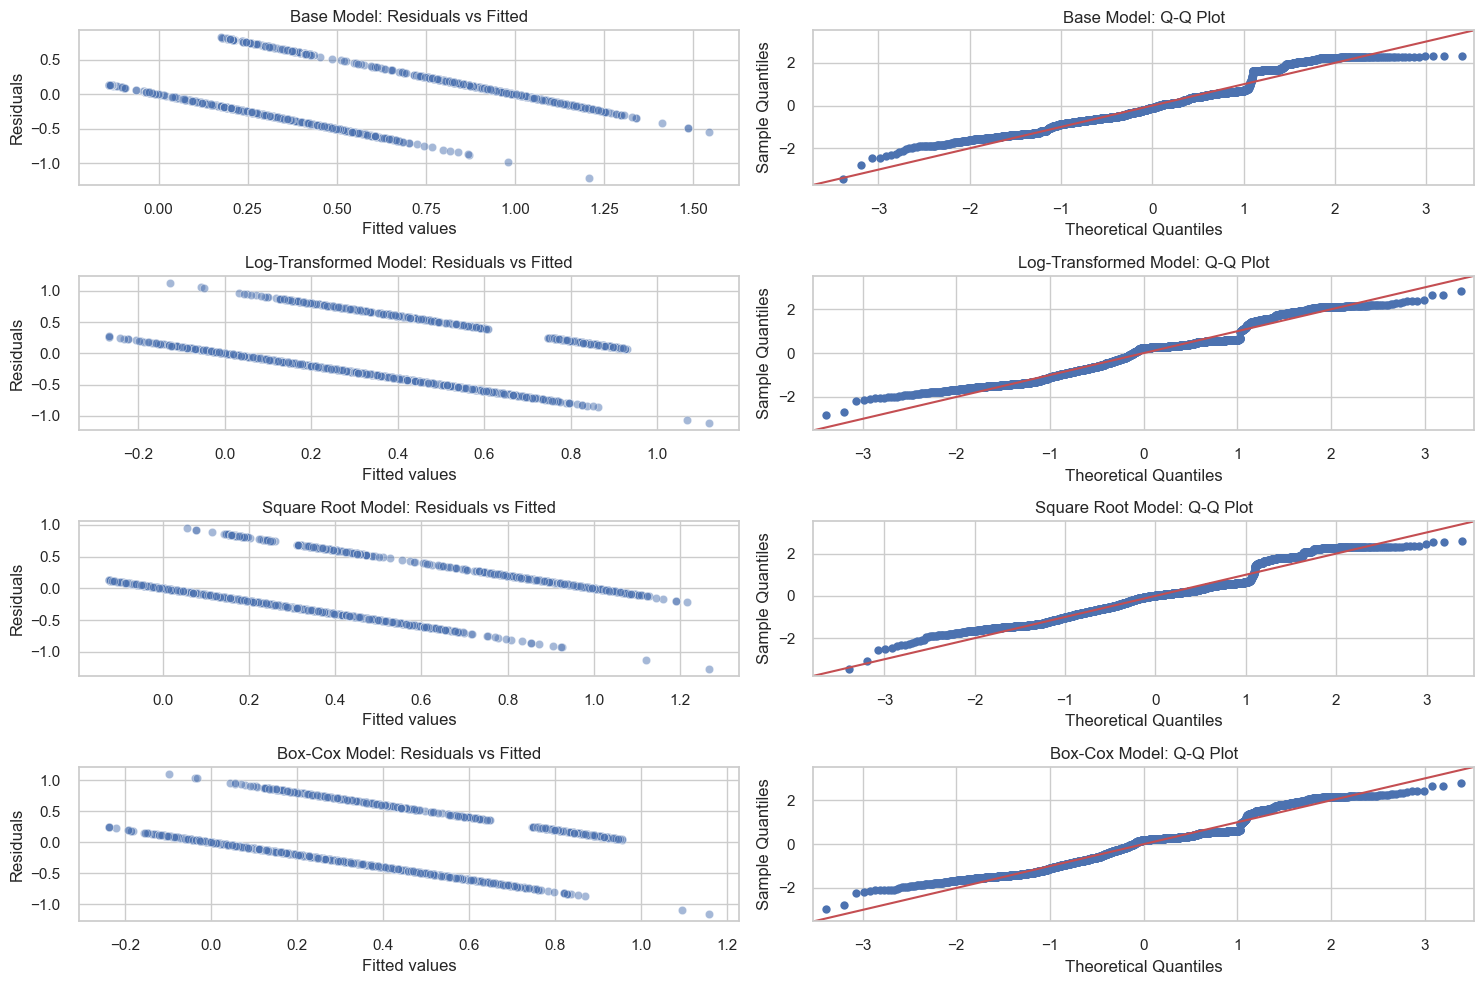

In [1432]:
# Function to plot Residuals vs Fitted Values
def plot_residuals_vs_fitted(model, title,counter):
    sns.scatterplot(x=model.fittedvalues, y=model.resid, alpha=0.5, ax=axes[counter,0])
    axes[counter,0].set_xlabel('Fitted values')
    axes[counter,0].set_ylabel('Residuals')
    axes[counter,0].set_title(title + ': Residuals vs Fitted')
    

# Function to plot Q-Q Plot
def plot_qq(model, title,counter):
    # Original Model QQ Plot
    sm.graphics.qqplot(model.resid, line='45', fit=True, ax=axes[counter,1])
    axes[counter,1].set_title(title + ': Q-Q Plot')
    
   
# Generate plots for all models
# Create diagnostic plots for both models
fig, axes = plt.subplots(4, 2, figsize=(15, 10))

counter = 0
for name, model in models.items():
    plot_residuals_vs_fitted(model, name, counter)
    plot_qq(model, name,counter)
    counter = counter+1

plt.tight_layout()
plt.show()


##### 12.2 plot Residuals vs Fitted Values using residplot

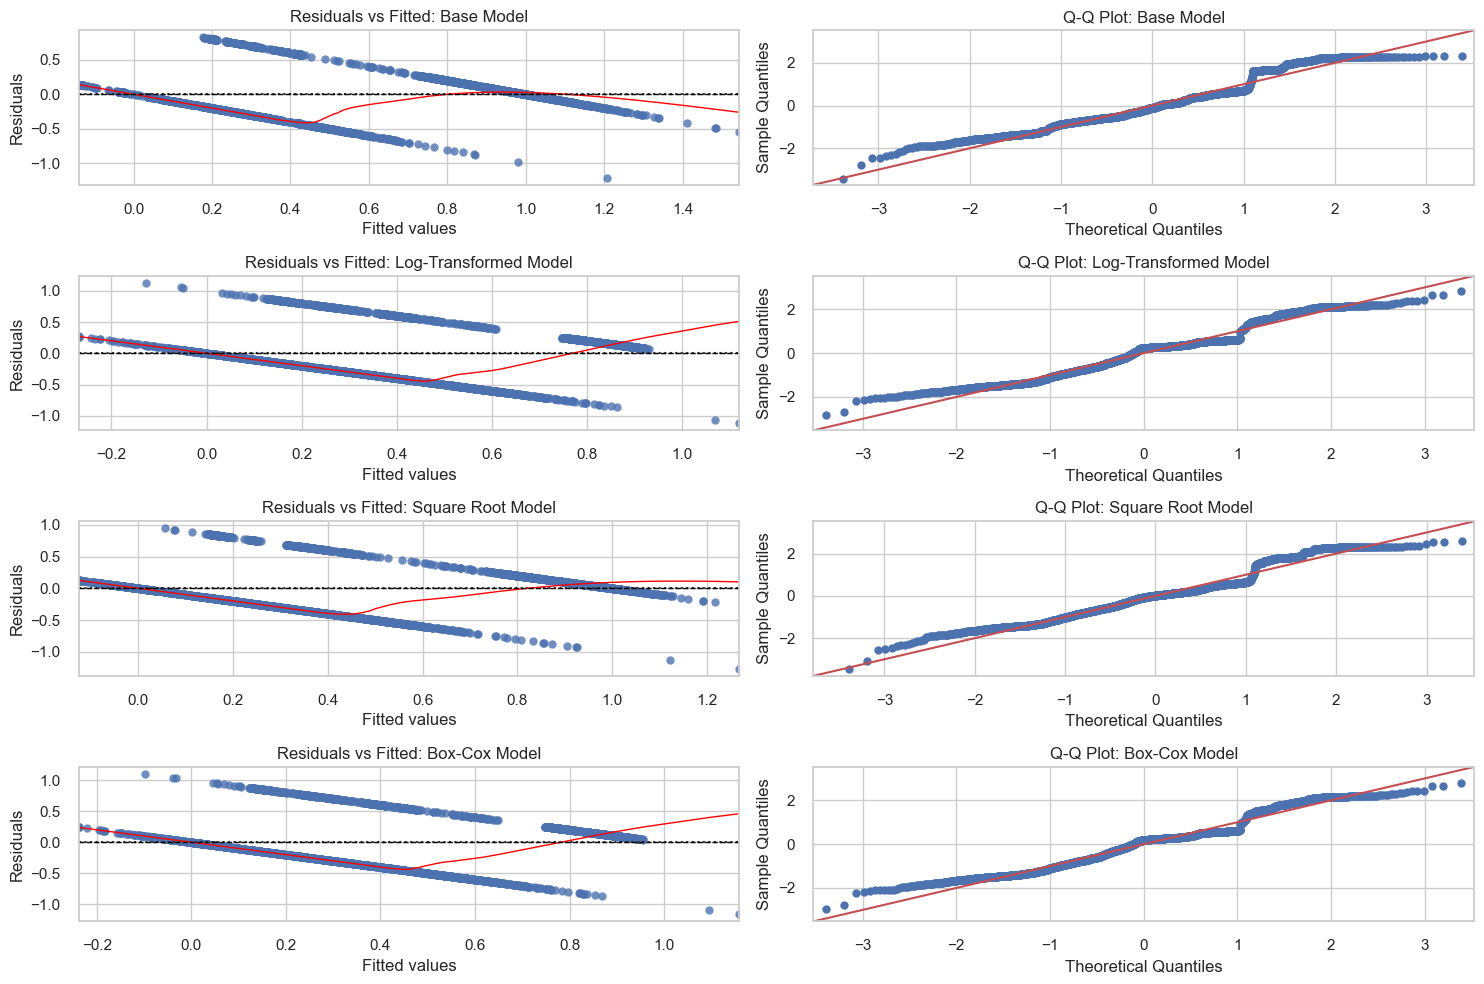

In [1434]:
# Function to plot Residuals vs Fitted Values
def plot_residuals_vs_fitted(model, title,counter):
    
    sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, ax=axes[counter,0],line_kws={'color': 'red', 'lw': 1})
    axes[counter,0].set_xlabel("Fitted values")
    axes[counter,0].set_ylabel("Residuals")
    axes[counter,0].set_title(f"Residuals vs Fitted: {title}")
    axes[counter,0].axhline(y=0, color='black', linestyle='--', lw=1)
    
# Function to plot Q-Q Plot
def plot_qq(model, title,counter):
    sm.qqplot(model.resid, line='45', fit=True,ax=axes[counter,1])
    axes[counter,1].set_title(f"Q-Q Plot: {title}")

# Generate plots for all models
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
counter=0
for name, model in models.items():
    plot_residuals_vs_fitted(model, name,counter)
    plot_qq(model, name,counter)
    counter = counter+1
    

plt.tight_layout()
plt.show()

#### 13. Display ADJUSTED_RSSQUARED values for all Models

In [1436]:
# Collect results for comparison
results_summary = {name: model.rsquared_adj for name, model in models.items()}
results_summary

{'Base Model': 0.5002302544594688,
 'Log-Transformed Model': 0.36089180827341716,
 'Square Root Model': 0.46644091947451605,
 'Box-Cox Model': 0.38003972600625224}

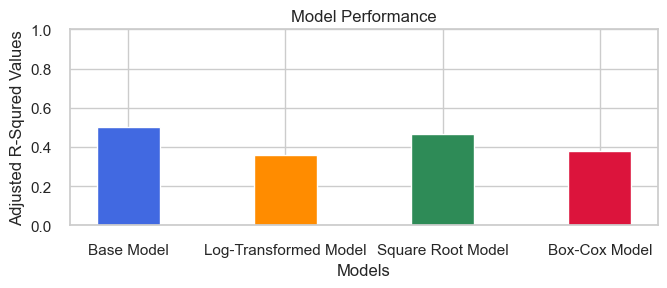

In [1600]:
# Plot Adjusted R-Squared values in graph
plt.figure(figsize=(6, 2)) # Set figure size for better visualization
# Create a bar chart to compare model accuracy
model_names = list(results_summary.keys())
adjusted_r2_values = list(results_summary.values())

# Define custom colors for each bar
colors = ["royalblue", "darkorange", "seagreen", "crimson"]
plt.bar(model_names, adjusted_r2_values, width=0.4, color=colors)
# Set labels and title
plt.xlabel('Models')
plt.ylabel('Adjusted R-Squred Values')
plt.title('Model Performance')
# Set Y-axis limits between 0 and 1 for proper scaling
plt.ylim(0.0, 1.0)
# Show the plot
plt.show()

#### 14. Calculate VIF for all 4 models

##### 14.1 Calculate VIF values

In [1440]:
# Calculate VIF for all 4 models
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_df_BaseModel = calculate_vif(X_train)
print("\nVIF for Original Model:")
print(vif_df_BaseModel)

vif_df_LogModel = calculate_vif(X_train_log)
print("\nVIF for Log-transformed Model:")
print(vif_df_LogModel)

vif_df_SQRTModel = calculate_vif(X_train_sqrt)
print("\nVIF for SQRT-transformed Model:")
print(vif_df_SQRTModel)

vif_df_BoxCoxModel = calculate_vif(X_train_boxcox)
print("\nVIF for BOX-COX-transformed Model:")
print(vif_df_BoxCoxModel)


VIF for Original Model:
               Variable       VIF
0      grocery_net_flag  1.000813
1     shopping_net_flag  2.319355
2         misc_pos_flag  1.012421
3      grocery_pos_flag  1.195586
4   health_fitness_flag  1.001398
5    gas_transport_flag  1.002582
6         misc_net_flag  1.466141
7        kids_pets_flag  1.002563
8     shopping_pos_flag  1.430201
9    entertainment_flag  1.034370
10     food_dining_flag  1.003599
11            home_flag  1.010128
12   personal_care_flag  1.001823
13          travel_flag  1.000245
14                  amt  2.106031

VIF for Log-transformed Model:
               Variable       VIF
0      grocery_net_flag  1.163661
1     shopping_net_flag  3.436395
2         misc_pos_flag  1.290160
3      grocery_pos_flag  3.607340
4   health_fitness_flag  1.244501
5    gas_transport_flag  1.551210
6         misc_net_flag  2.276367
7        kids_pets_flag  1.410179
8     shopping_pos_flag  2.193867
9    entertainment_flag  1.515884
10     food_dining_flag  

##### 14.2 Display VIF values in graph

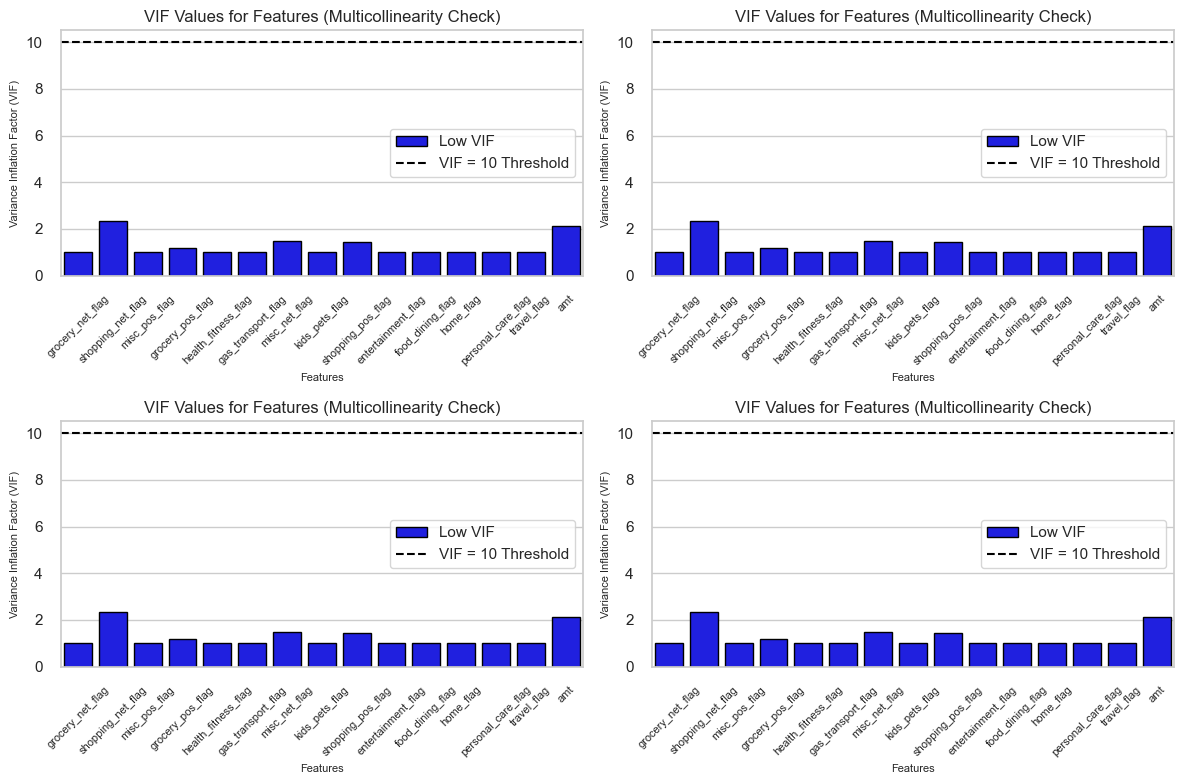

In [1442]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to plot VIF
def plot_VIF(VIFmodel, x, y,title_fontsize=12, label_fontsize=8, tick_fontsize=8, legend_fontsize=12):
    # Create a new column for color categories eg: Red for VIF > 10 (High Multicollinearity), Blue for VIF <= 10
    VIFmodel["VIF Category"] = VIFmodel["VIF"].apply(lambda x: "High VIF" if x > 10 else "Low VIF")

    # Plot the VIF values on the specified axes[x, y]
    sns.barplot(
        x="Variable", y="VIF", hue="VIF Category", data=VIFmodel, 
        palette={"High VIF": "red", "Low VIF": "blue"}, edgecolor="black", ax=axes[x, y]
    )

    # Formatting
    axes[x, y].tick_params(axis='x', rotation=45,labelsize=tick_fontsize)  # Rotate feature names for readability
    axes[x, y].axhline(y=10, color="black", linestyle="dashed", linewidth=1.5, label="VIF = 10 Threshold")
    axes[x, y].set_xlabel("Features", fontsize=label_fontsize)
    axes[x, y].set_ylabel("Variance Inflation Factor (VIF)", fontsize=label_fontsize)
    axes[x, y].set_title("VIF Values for Features (Multicollinearity Check)",fontsize=title_fontsize)
    axes[x, y].legend()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Generate plots for all models
plot_VIF(vif_df_BaseModel, 0, 0)  # Base Model
plot_VIF(vif_df_BaseModel, 0, 1)  # Log-transformed Model (replace with actual data)
plot_VIF(vif_df_BaseModel, 1, 0)  # Square Root Model (replace with actual data)
plot_VIF(vif_df_BaseModel, 1, 1)  # Box-Cox Model (replace with actual data)

plt.tight_layout()  # Ensure tight layout for better spacing
plt.show()


#### 15. Perform Breusch-Pagan test for heteroscedasticity for all 4 models

In [1444]:
# Perform Breusch-Pagan test for heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan

def perform_heteroscedasticity_test(model):
    bp_test = het_breuschpagan(model.resid, model.model.exog)
    return pd.Series({
        'LM stat': bp_test[0],
        'LM p-value': bp_test[1],
        'F stat': bp_test[2],
        'F p-value': bp_test[3]
    })

print("\nBreusch-Pagan test for Original Model:")
print(perform_heteroscedasticity_test(base_model))

print("\nBreusch-Pagan test for Log-transformed Model:")
print(perform_heteroscedasticity_test(log_model))

print("\nBreusch-Pagan test for SQRT-Transformed Model:")
print(perform_heteroscedasticity_test(sqrt_model))

print("\nBreusch-Pagan test for BOX-COX-transformed Model:")
print(perform_heteroscedasticity_test(boxcox_model))



Breusch-Pagan test for Original Model:
LM stat        8.370267e+02
LM p-value    1.041652e-168
F stat         8.419064e+01
F p-value     6.794227e-202
dtype: float64

Breusch-Pagan test for Log-transformed Model:
LM stat        8.150798e+02
LM p-value    5.112089e-164
F stat         8.109939e+01
F p-value     2.739331e-195
dtype: float64

Breusch-Pagan test for SQRT-Transformed Model:
LM stat        9.349430e+02
LM p-value    1.166964e-189
F stat         9.884504e+01
F p-value     2.671472e-232
dtype: float64

Breusch-Pagan test for BOX-COX-transformed Model:
LM stat        8.591211e+02
LM p-value    1.964939e-173
F stat         8.737147e+01
F p-value     1.278010e-208
dtype: float64


#### 16. Build additional models - Decision Tree Model

##### 16.1 Build Model

In [1611]:
# Create and train the model
model = DecisionTreeClassifier(
    criterion='entropy',  # Use entropy as in C5.0
    max_depth=7,         # Limit tree depth
    min_samples_split=20,# Minimum samples for split
    random_state=42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=20,
                       random_state=42)

##### 16.2 Display metrics

In [1613]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9453

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       378
           1       0.92      0.96      0.94       335

    accuracy                           0.95       713
   macro avg       0.94      0.95      0.95       713
weighted avg       0.95      0.95      0.95       713



##### 16.3 Plot graph

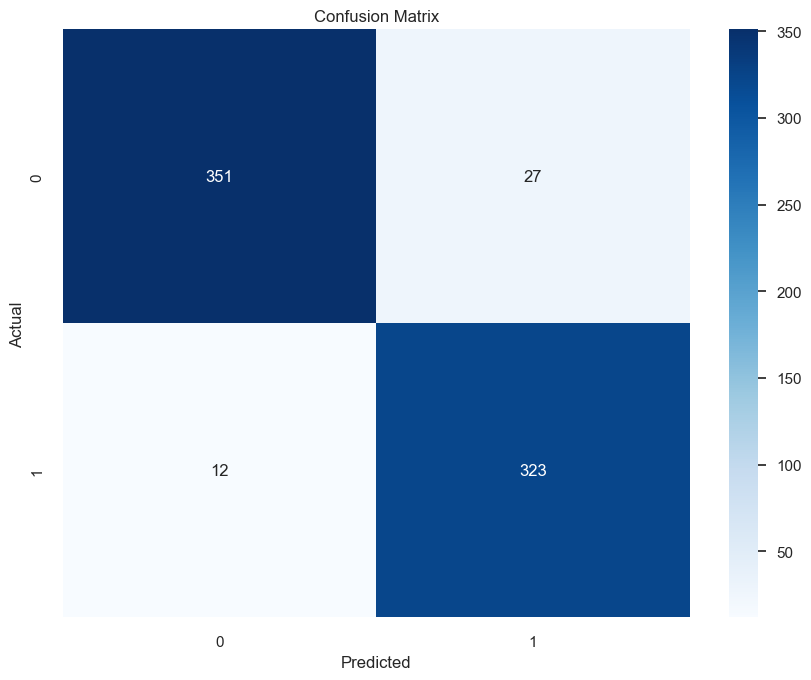

In [1615]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### 16.4 Perform sample predictions

In [1621]:
# Sample predictions
print("\nSample Predictions:")
sample_data = X_test.head(5)
sample_predictions = model.predict(sample_data)
sample_probabilities = model.predict_proba(sample_data)

for i, (pred, prob) in enumerate(zip(sample_predictions, sample_probabilities)):
    print(f"\nCase {i+1}:")
    print(f"Features: {dict(sample_data.iloc[i])}")
    print(f"Prediction: {'Approved' if pred == 1 else 'Denied'}")
    print(f"Probability: {prob[1]:.4f}")


Sample Predictions:

Case 1:
Features: {'grocery_net_flag': 0.0, 'shopping_net_flag': 0.0, 'misc_pos_flag': 0.0, 'grocery_pos_flag': 1.0, 'health_fitness_flag': 0.0, 'gas_transport_flag': 0.0, 'misc_net_flag': 0.0, 'kids_pets_flag': 0.0, 'shopping_pos_flag': 0.0, 'entertainment_flag': 0.0, 'food_dining_flag': 0.0, 'home_flag': 0.0, 'personal_care_flag': 0.0, 'travel_flag': 0.0, 'amt': 314.7}
Prediction: Approved
Probability: 1.0000

Case 2:
Features: {'grocery_net_flag': 0.0, 'shopping_net_flag': 0.0, 'misc_pos_flag': 0.0, 'grocery_pos_flag': 1.0, 'health_fitness_flag': 0.0, 'gas_transport_flag': 0.0, 'misc_net_flag': 0.0, 'kids_pets_flag': 0.0, 'shopping_pos_flag': 0.0, 'entertainment_flag': 0.0, 'food_dining_flag': 0.0, 'home_flag': 0.0, 'personal_care_flag': 0.0, 'travel_flag': 0.0, 'amt': 52.22}
Prediction: Denied
Probability: 0.0000

Case 3:
Features: {'grocery_net_flag': 0.0, 'shopping_net_flag': 0.0, 'misc_pos_flag': 0.0, 'grocery_pos_flag': 0.0, 'health_fitness_flag': 0.0, 'ga

##### 16.5 Display ROC Curve

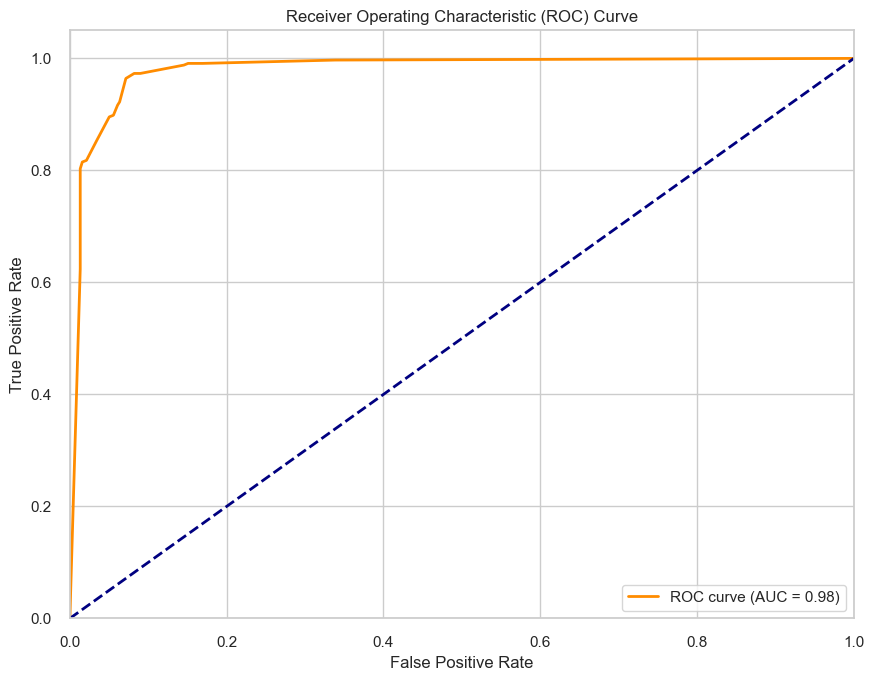

In [1623]:
# Calculate ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### 16.6 Display first few rows from train and test data

In [1202]:
print("First 5 rows of X_train:\n", X_train[:5])
print("\nFirst 5 rows of X_test:\n", X_test[:5])
print("\nFirst 5 labels of y_train:\n", y_train[:5])
print("\nFirst 5 labels of y_test:\n", y_test[:5])

First 5 rows of X_train:
        grocery_net_flag  shopping_net_flag  misc_pos_flag  grocery_pos_flag  \
633                   0                  0              0                 0   
3069                  0                  0              0                 0   
7085                  0                  0              0                 0   
8292                  0                  0              0                 0   
10507                 0                  0              0                 0   

       health_fitness_flag  gas_transport_flag  misc_net_flag  kids_pets_flag  \
633                      0                   0              0               1   
3069                     0                   0              0               1   
7085                     0                   0              0               0   
8292                     0                   1              0               0   
10507                    0                   0              0               0   

       shopp

##### 16.7 Create Decision Tree Classifier

In [1450]:
# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
dt_accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {dt_accuracy:.2f}")

Accuracy: 0.94


In [1452]:
# confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[336  21]
 [ 20 336]]


In [1454]:
clf = DecisionTreeClassifier(
    max_depth=5, # Limits the maximum depth of the tree to 5 levels, high levels: overfitting, less: bias
    min_samples_split=5, # Specifies the minimum number of samples required to split an internal node
    min_samples_leaf=2, # Defines the minimum number of samples that a leaf node must contain
    max_features='sqrt', # the algorithm will randomly select a subset of features equal to the square root of the total number of features
    random_state=42
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

##### 16.8 Display Decision Nodes

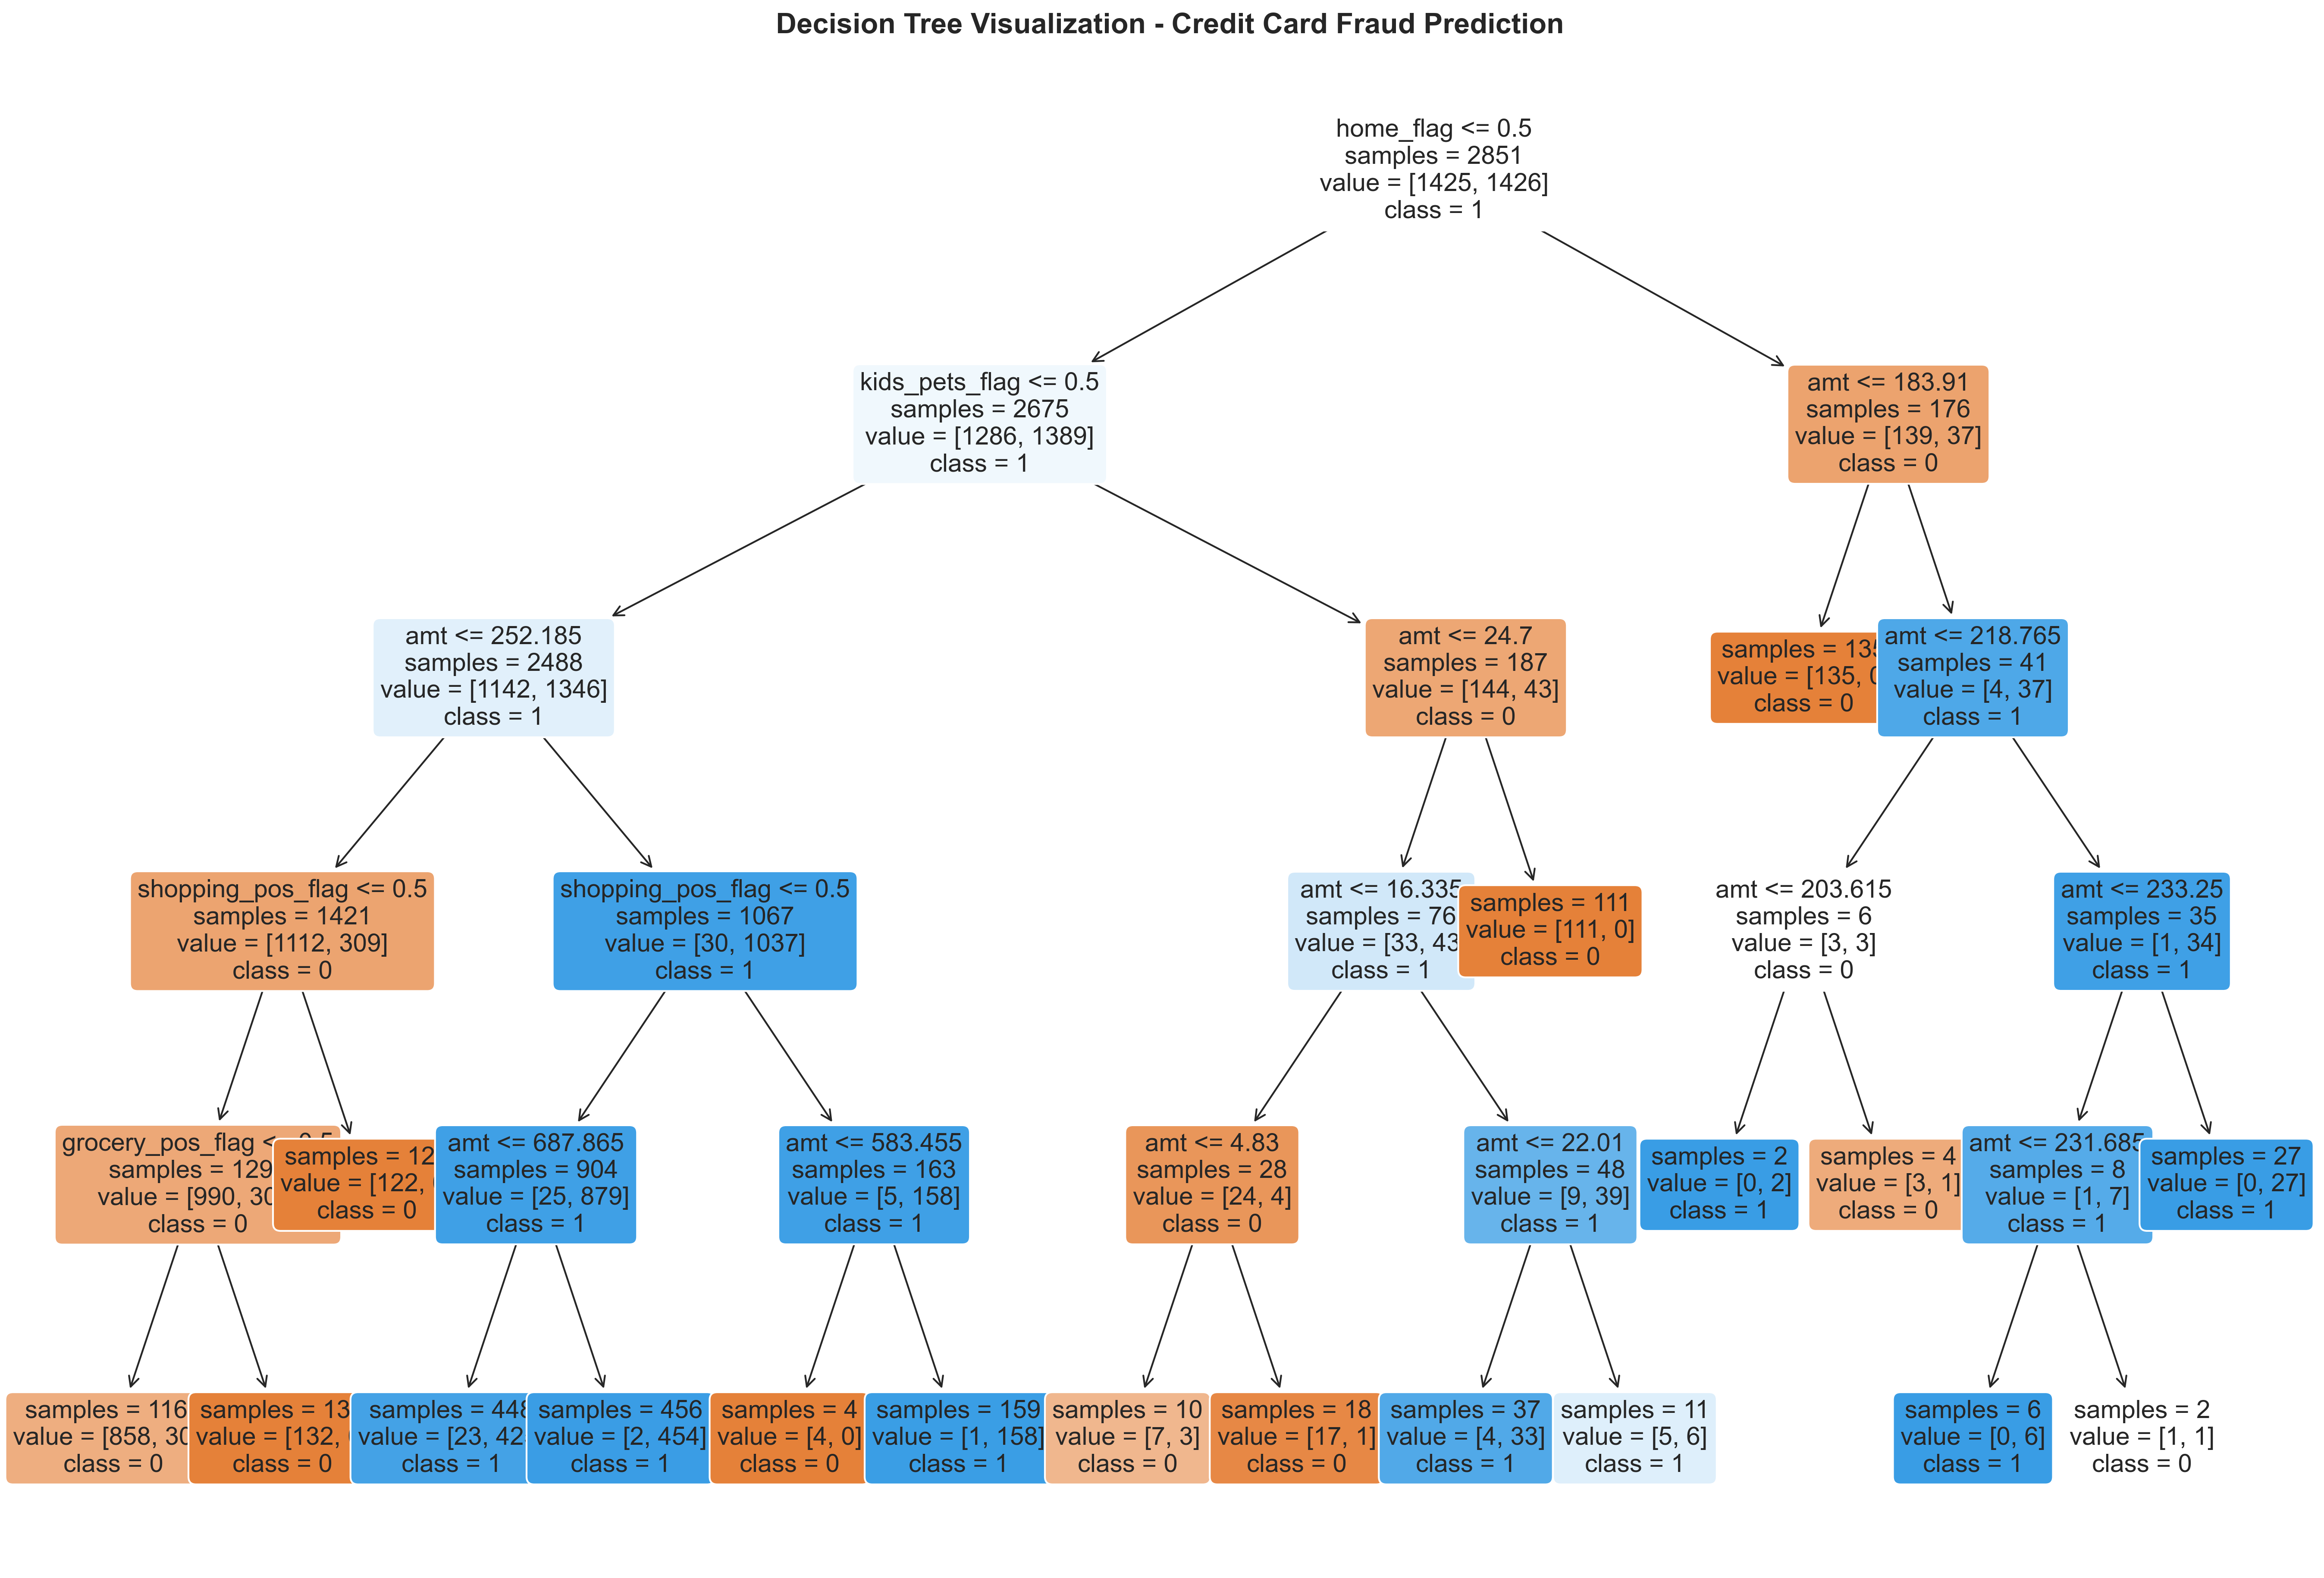

In [1456]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 12), dpi=300)  # Large and clear
# Apply a better matplotlib style
# print(plt.style.available)
plt.style.use("Solarize_Light2")

plot_tree(clf, feature_names=X_train.columns, 
          class_names=[str(cls) for cls in set(y)], 
          filled=True, rounded=True, fontsize=14, 
          impurity=False)  # Using a nice colormap

plt.title("Decision Tree Visualization - Credit Card Fraud Prediction", fontsize=16, fontweight="bold")
plt.show()

#### 17. Build additional Models - Continuation - LDA, QDA and KNN

##### 17.1 Train an devaluate Models

In [1504]:
def train_evaluate_models(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_IndVars_All, y, test_size=0.2, random_state=42)
    
    # Initialize models
    lda = LinearDiscriminantAnalysis()
    qda = QuadraticDiscriminantAnalysis()
    knn = KNeighborsClassifier(n_neighbors=5)
    
    models = {
        'LDA': lda,
        'QDA': qda,
        'kNN': knn
    }
    
    # Train and evaluate each model
    results = {}
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        # Calculate metrics
        results[name] = {
            'model': model,
            'y_test': y_test,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }
        # Print results
        print(f"\n{name} Results:")
        print("\nClassification Report:")
        # print(classification_report(y_test, y_pred,output_dict=True))
        report = classification_report(y_test, y_pred,output_dict=True)
        print (report)
     
        # Calculate cross-validation scores
        cv_scores = cross_val_score(model, X, y, cv=5)
        print(f"\nCross-validation scores: {cv_scores}")
        print(f"Average CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    return results

##### 17.2 Plot the graph

In [1506]:
def plot_roc_curves(results):
    plt.figure(figsize=(10, 6))
    
    for name, result in results.items():
        fpr, tpr, _ = roc_curve(result['y_test'], result['y_pred_proba'])
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

##### 17.3 Plot confusion Matrix

In [1508]:
def plot_confusion_matrices(results):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    for (name, result), ax in zip(results.items(), axes):
        cm = confusion_matrix(result['y_test'], result['y_pred'])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(f'{name} Confusion Matrix')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()

##### 17.4 Prepare Data

In [1510]:
def prepare_data():
   # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_IndVars_All)
    
    return X_scaled, y

##### 17.5 Initiate Models building by calling functions

In [1512]:
X, y = prepare_data()

results = train_evaluate_models(X, y)


LDA Results:

Classification Report:
{'0': {'precision': 0.8014018691588785, 'recall': 0.9074074074074074, 'f1-score': 0.8511166253101737, 'support': 378.0}, '1': {'precision': 0.8771929824561403, 'recall': 0.746268656716418, 'f1-score': 0.8064516129032258, 'support': 335.0}, 'accuracy': 0.8316970546984572, 'macro avg': {'precision': 0.8392974258075094, 'recall': 0.8268380320619126, 'f1-score': 0.8287841191066998, 'support': 713.0}, 'weighted avg': {'precision': 0.8370119995299623, 'recall': 0.8316970546984572, 'f1-score': 0.8301309602942865, 'support': 713.0}}

Cross-validation scores: [0.81346424 0.80364656 0.82748948 0.75876578 0.78230337]
Average CV score: 0.7971 (+/- 0.0484)

QDA Results:

Classification Report:
{'0': {'precision': 0.8675675675675676, 'recall': 0.8492063492063492, 'f1-score': 0.8582887700534759, 'support': 378.0}, '1': {'precision': 0.8338192419825073, 'recall': 0.8537313432835821, 'f1-score': 0.8436578171091446, 'support': 335.0}, 'accuracy': 0.8513323983169705,

C:\Users\pemma\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\pemma\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\pemma\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\pemma\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\pemma\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\pemma\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Cross-validation scores: [0.95511921 0.96353436 0.96072931 0.95932679 0.96629213]
Average CV score: 0.9610 (+/- 0.0076)


##### 17.5 Plot ROC curves for checking model performance

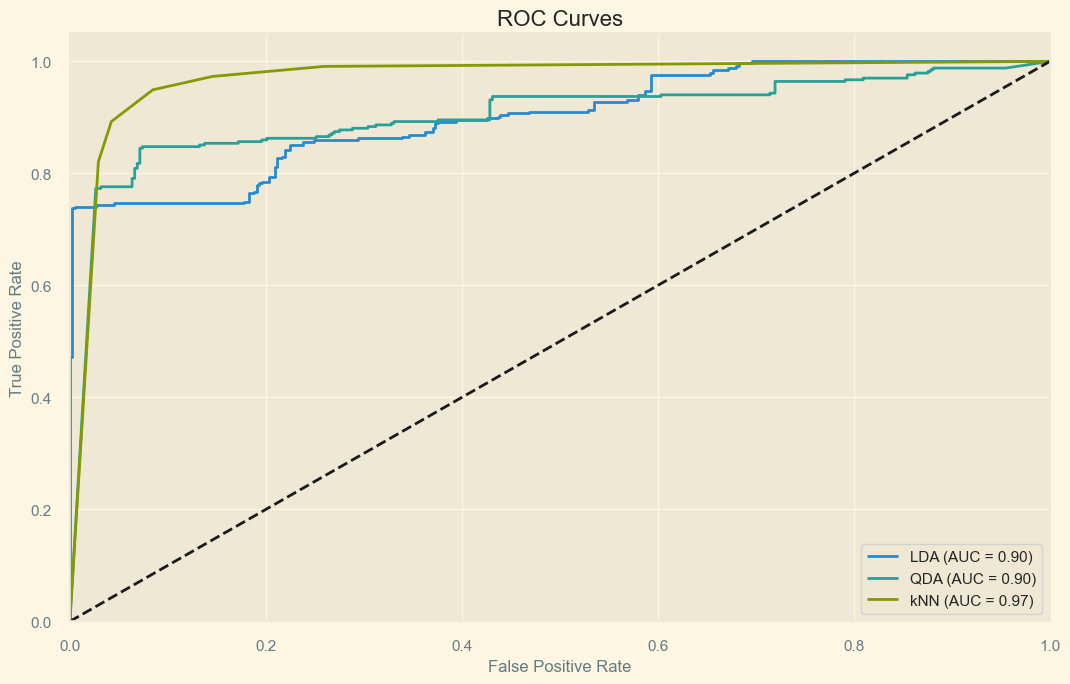

In [1514]:
plot_roc_curves(results)

##### 17.6 Plot Confusion Matrix for models

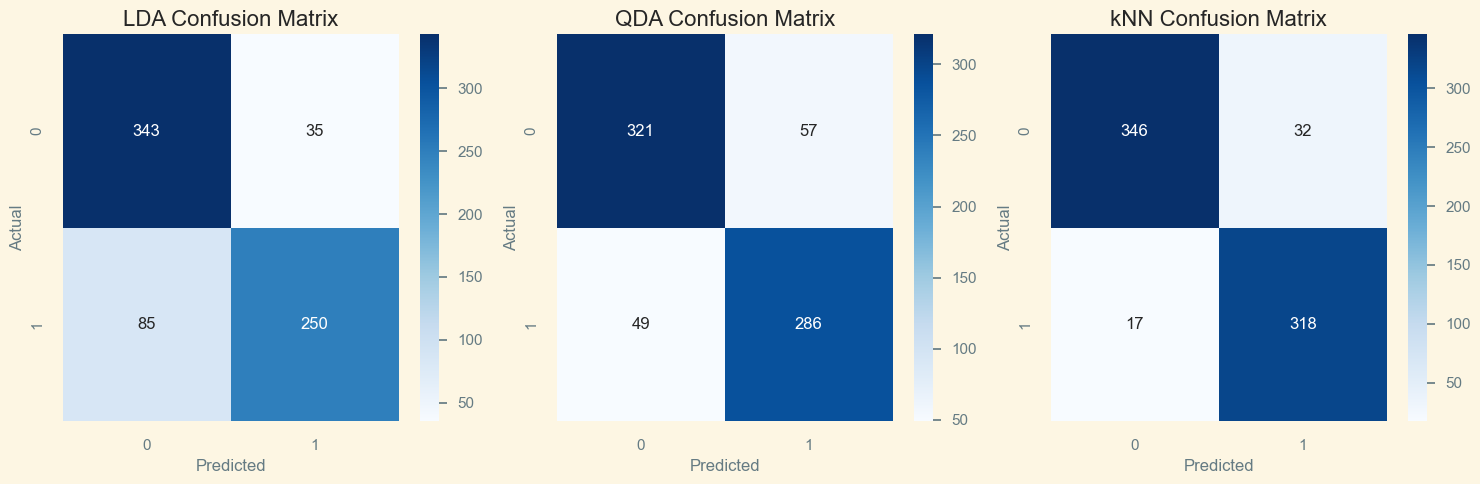

In [1516]:
plot_confusion_matrices(results)

##### 17.7 Compare 3 Models - LDA, QDA and KNN

In [1518]:
model_comparison = pd.DataFrame({
    name: {
        'Accuracy': (result['y_pred'] == result['y_test']).mean(),
        'ROC AUC': auc(
            *roc_curve(result['y_test'], result['y_pred_proba'])[:2]
        )
    }
    for name, result in results.items()
}).T

print("\nModel Comparison:")
print(model_comparison)

lda_accuracy = model_comparison.loc["LDA", "Accuracy"]
qda_accuracy = model_comparison.loc["QDA", "Accuracy"]
knn_accuracy = model_comparison.loc["kNN", "Accuracy"]


Model Comparison:
     Accuracy   ROC AUC
LDA  0.831697  0.902401
QDA  0.851332  0.903648
kNN  0.931276  0.969885


##### 17.8 Plot decision boundries for 3 models - LDA, QDA and KNN

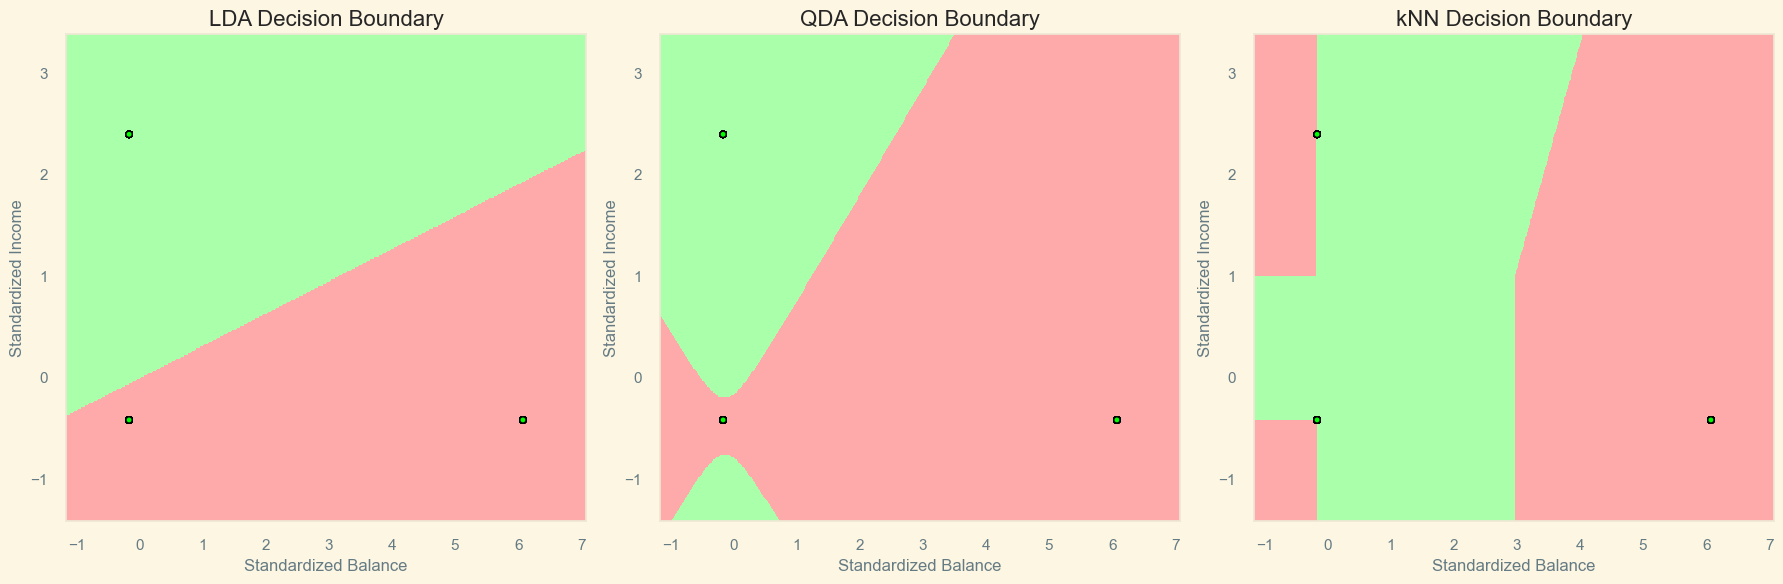

In [1520]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, models, feature_names=['Balance', 'Income']):
    # Reduce to 2D for visualization (using first two features)
    X_2d = X[:, :2]
    
    # Create mesh grid
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    
    # Plot each model
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for idx, (name, model) in enumerate(models.items()):
        # Train model on 2D data
        model.fit(X_2d, y)
        
        # Plot decision boundary
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        axes[idx].contourf(xx, yy, Z, cmap=cmap_light)
        axes[idx].scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=cmap_bold, 
                         edgecolors='black', s=20)
        
        axes[idx].set_title(f'{name} Decision Boundary')
        axes[idx].set_xlabel(feature_names[0])
        axes[idx].set_ylabel(feature_names[1])
        axes[idx].set_xlim(xx.min(), xx.max())
        axes[idx].set_ylim(yy.min(), yy.max())
    
    plt.tight_layout()
    plt.show()

# Get the data and models
X, y = prepare_data()
models = {
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'kNN': KNeighborsClassifier(n_neighbors=5)
}

# Plot decision boundaries
plot_decision_boundaries(X, y, models, ['Standardized Balance', 'Standardized Income'])

#### 18. Display 5 most important features

In [1522]:
#feature_imp = np.abs(log_model.coef_[0]) # Get the absolute values of logistic regression coefficients (feature importance)
feature_imp = np.abs(log_model.params[0]) # Get the absolute values of logistic regression coefficients (feature importance)
feature_names = X_IndVars_All.columns # Extract feature names from X (dataset features)
# Create a DataFrame for feature importance
fi_df = pd.DataFrame({ 'Feature': feature_names, 'Importance': feature_imp })
# Sort features by importance (descending order)
fi_df = fi_df.sort_values(by='Importance', ascending=False, ignore_index=True)
# Display the top 5 most important features
fi_df.head()

C:\Users\pemma\AppData\Local\Temp\ipykernel_9044\1122222726.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_imp = np.abs(log_model.params[0]) # Get the absolute values of logistic regression coefficients (feature importance)


,Feature,Importance
0,grocery_net_flag,0.200841
1,shopping_net_flag,0.200841
2,misc_pos_flag,0.200841
3,grocery_pos_flag,0.200841
4,health_fitness_flag,0.200841


#### 19. Building additional Models Continuation - GaussianNB

In [1524]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_IndVars_All, y, test_size=0.2, random_state=42)

# Initialize and train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate the model
gnb_accuracy = accuracy_score(y_test, y_pred)
gnb_precision = precision_score(y_test, y_pred)
gnb_recall = recall_score(y_test, y_pred)

# Generating a confusion matrix to evaluate predictions
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


# Print accuracy of the model
print(f'Accuracy: {gnb_accuracy}, Precision: {gnb_precision}, Recall: {gnb_recall}')


Accuracy: 0.7223001402524544, Precision: 0.6897506925207756, Recall: 0.7432835820895523


#### 20. Consolidate the all model performace and show in graph

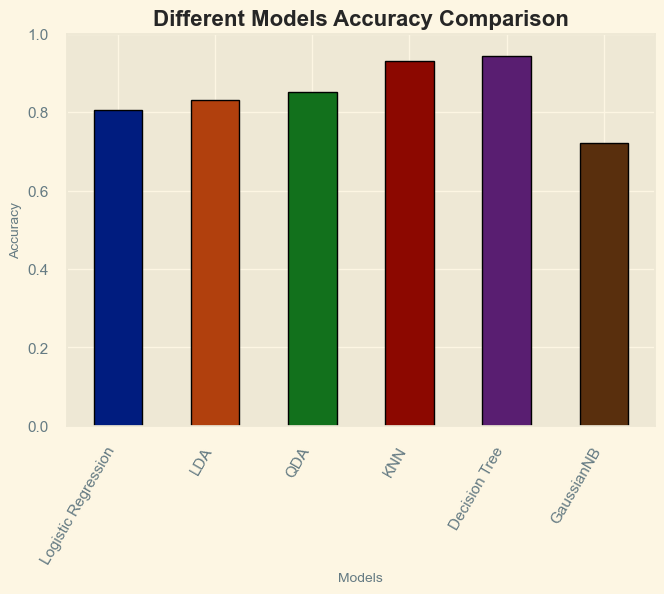

In [1542]:
# Define model names
model_names = ['Logistic Regression', 'LDA', 'QDA', 'KNN', 'Decision Tree', 'GaussianNB']

# Define accuracy values for all six models
accuracy_values = [lr_accuracy, lda_accuracy, qda_accuracy, knn_accuracy, dt_accuracy, gnb_accuracy]

# Create a bar chart to compare model accuracy
plt.figure(figsize=(6, 4)) # Set figure size for better visualization
#plt.bar(model_names, accuracy_values, width=0.4)

# Use Seaborn's color palette
colors = sns.color_palette("dark")  # Other options: "deep", "muted", "dark"

# Create a bar chart
plt.bar(model_names, accuracy_values, color=colors, edgecolor="black", width=0.5)

# Set labels and title
plt.xlabel('Models',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Different Models Accuracy Comparison',fontsize=16,fontweight="bold")
# Rotate x-axis labels for better readability
plt.xticks(rotation=60, ha="right")
# Set Y-axis limits between 0 and 1 for proper scaling
plt.ylim(0.0, 1.0)
# Show the plot
plt.show()